# Xception

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Path to dataset directories
train_dir = "/kaggle/input/deepfake-and-real-images/Dataset/Train"
validation_dir = "/kaggle/input/deepfake-and-real-images/Dataset/Validation"
test_dir = "/kaggle/input/deepfake-and-real-images/Dataset/Test"

# Set batch size and image size
batch_size = 64
img_size = (299, 299)

# Data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training dataset
train_data_x = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess the validation dataset
validation_data_x = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess the test dataset
test_data_x = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load the pre-trained Xception model without the top layers
base_model = Xception(weights='imagenet', input_shape=(299, 299, 3), include_top=False)

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Add a new output layer for binary classification
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)  # 1 output node with sigmoid activation for binary classification

# Create the fine-tuned model
model = keras.models.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_x,
    epochs=10,
    validation_data=validation_data_x
)

model.summary()


2024-08-01 02:19:16.959351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 02:19:16.959462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 02:19:17.108322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722478893.664776     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3576s 2s/step - accuracy: 0.7281 - loss: 0.5375 - val_accuracy: 0.7681 - val_loss: 0.4849
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2998s 1s/step - accuracy: 0.7752 - loss: 0.4692 - val_accuracy: 0.7646 - val_loss: 0.4951
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2930s 1s/step - accuracy: 0.7822 - loss: 0.4565 - val_accuracy: 0.7754 - val_loss: 0.4731
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2943s 1s/step - accuracy: 0.7836 - loss: 0.4531 - val_accuracy: 0.7758 - val_loss: 0.4746
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2996s 1s/step - accuracy: 0.7883 - loss: 0.4474 - val_accuracy: 0.7778 - val_loss: 0.4737
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2956s 1s/step - accuracy: 0.7849 - loss: 0.4475 - val_accuracy: 0.7784 - val_loss: 0.4685
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2973s 1s/step - accuracy: 0.7900 - loss: 0.4434 - val_accuracy: 0.7755 - val_loss: 0.4774
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2962s 1s/step - accuracy: 0.7884 - loss: 0.44

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 20,867,629 (79.60 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 4,100 (16.02 KB)

In [2]:
# Save the trained model
model.save('xception.h5')

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_xception.csv', index=False)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data_x)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%')


171/171 ━━━━━━━━━━━━━━━━━━━━ 122s 713ms/step - accuracy: 0.7259 - loss: 0.5714
Test Loss: 0.5622, Test Accuracy: 72.94%


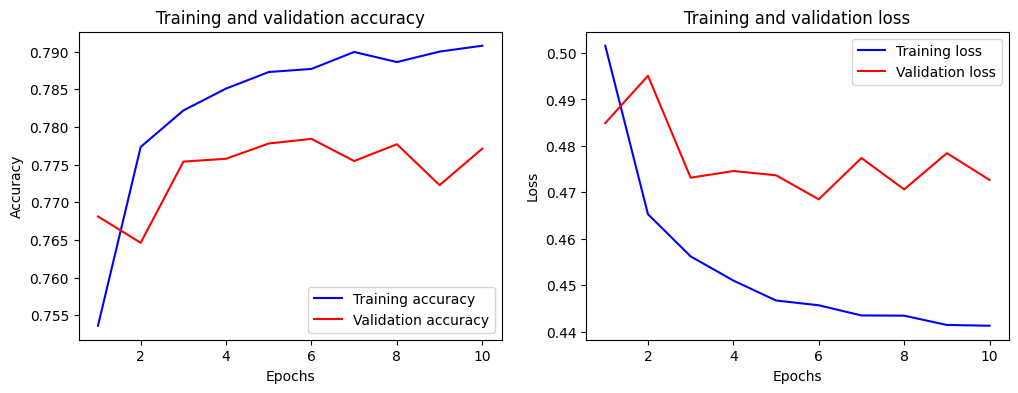

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.applications import Xception
from keras.optimizers import Adam
import tensorflow as tf
def learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot training and validation accuracy per epoch
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss per epoch
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

learning_curves(history)


171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 236ms/step


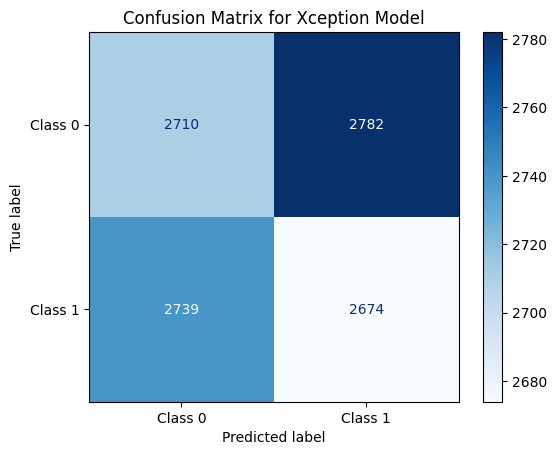

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = test_data_x.classes
y_pred = (model.predict(test_data_x) > 0.5).astype('int32').flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Xception Model')
plt.show()
